In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_dir = "./data"

Load the dataset asa build in Build_WaterQualityDataset

In [3]:
df = pd.read_csv(data_dir+'/WaterQuality.csv', );

We keep only locations in Portsmouth Area

In [4]:
list_loc_langstone = ["SO-G0003493", "SO-G0016920","SO-G0003484","SO-G0016918","SO-G0015927",\
                              "SO-G0003468","SO-G0003467","SO-G0016921","SO-G0003473", "SO-G0003616", "SO-G0003625", "SO-G0003368", "SO-G0003508","SO-G0003484","SO-G0016873","SO-Y0003370"]

df_langstone = df[df["sample.samplingPoint.notation"].isin(list_loc_langstone)]

df_langstone.to_csv("/home/nannil/InnovationProject_WaterQuality/data/WaterQuality_Portsmouth_frequentdet.csv")

The dataset contains lots of determinants that are not frequently observed, and therefore they are not good to study how pollution has evolved in time, we keep only frequent results, i.e. quantities that have been studied frequently in time

In [5]:
determinants = set(df_langstone['determinand.definition'])

sampling_time = set(df_langstone['sample.sampleDateTime'])


frequent_determinant = []

for det in determinants:
    if len(df_langstone[df_langstone['determinand.definition']== det]["result"])>len(sampling_time)/4:
        frequent_determinant.append(det)

In [6]:
set(frequent_determinant)

{'Ammoniacal Nitrogen as N',
 'Ammoniacal Nitrogen, Filtered as N',
 'BOD : 5 Day ATU',
 'Chlorophyll : Acetone Extract',
 'NGR : Easting',
 'NGR : Northing',
 'Nitrate as N',
 'Nitrate, Filtered as N',
 'Nitrite as N',
 'Nitrite, Filtered as N',
 'Nitrogen, Dissolved Inorganic : as N',
 'Nitrogen, Total Oxidised as N',
 'Nitrogen, Total Oxidised, Filtered as N',
 'Orthophosphate, Filtered as P',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Salinity : In Situ',
 'Sample Depth below surface',
 'Silicate, Filtered as SiO2',
 'Temperature of Water',
 'Time of high tide',
 'Time of sampling relative to previous high water',
 'Turbidity : In Situ',
 'Volume of Sample Filtered',
 'Water Depth',
 'pH'}

In [7]:
df_sub = df_langstone[df_langstone['determinand.definition'].isin(frequent_determinant)]

In [8]:
df_sub.to_csv(data_dir+"/WaterQuality_frequentdet.csv")


In [9]:
df_sub

,Unnamed: 0,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
116305,116305,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2001-01-30T09:01:00,Ammonia(N),Ammoniacal Nitrogen as N,111,NaN,0.024,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
116306,116306,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2001-01-30T09:01:00,pH,pH,61,NaN,7.900,NaN,phunits,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
116308,116308,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2001-01-30T09:01:00,N Oxidised,"Nitrogen, Total Oxidised as N",116,NaN,0.346,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
116309,116309,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2001-01-30T09:01:00,Nitrate-N,Nitrate as N,117,NaN,0.341,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
116310,116310,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003368,SELSEY BILL B/S,2001-01-30T09:01:00,Nitrite-N,Nitrite as N,118,NaN,0.005,NaN,mg/l,SEA WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,483000,85500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912917,3912917,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2024-11-08T10:31:00,Sample Depth,Sample Depth below surface,6,NaN,11.170,NaN,m,SEA WATER,False,MONITORING (NATIONAL AGENCY POLICY),474130,85280
3912918,3912918,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2024-11-08T10:31:00,HTrlTW,Time of sampling relative to previous high water,7342,NaN,7.100,NaN,hh.mm,SEA WATER,False,MONITORING (NATIONAL AGENCY POLICY),474130,85280
3912919,3912919,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2024-11-08T10:31:00,Oxygen Diss,"Oxygen, Dissolved as O2",9924,NaN,7.970,NaN,mg/l,SEA WATER,False,MONITORING (NATIONAL AGENCY POLICY),474130,85280
3912920,3912920,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0003370,NAB TOWER B/S,2024-11-08T10:31:00,NGR Easting,NGR : Easting,6019,NaN,474081.000,NaN,ngr,SEA WATER,False,MONITORING (NATIONAL AGENCY POLICY),474130,85280


We have each of the time and locations combination repeated as many time as different quantities are observed. It's easier to work on a dataset with each of the quantities observed as columns, therefore we pivot the dataset

In [15]:
piv = df_sub.pivot(index=['sample.sampleDateTime', "sample.samplingPoint.easting","sample.samplingPoint.northing",  "sample.sampledMaterialType.label"],\
                   columns=['determinand.definition',], values='result')

In [16]:
piv = piv.reset_index()

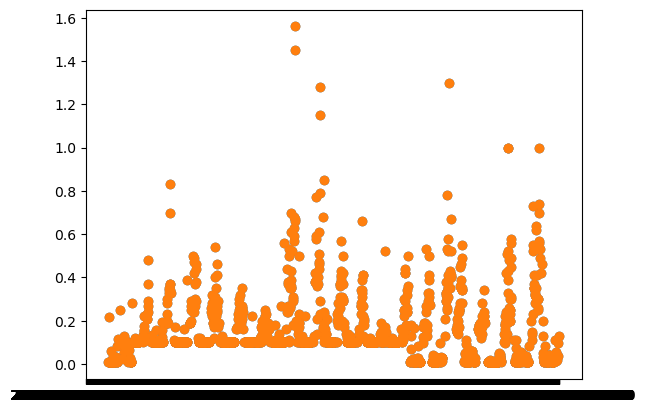

In [17]:
plt.scatter(piv['sample.sampleDateTime']\
         , piv['Nitrogen, Total Oxidised, Filtered as N'])
plt.scatter(df_sub[df_sub['determinand.definition']== 'Nitrogen, Total Oxidised, Filtered as N']['sample.sampleDateTime']\
         , df_sub[df_sub['determinand.definition']== 'Nitrogen, Total Oxidised, Filtered as N']["result"])

plt.show()

In [18]:
piv

determinand.definition,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",BOD : 5 Day ATU,Chlorophyll : Acetone Extract,NGR : Easting,NGR : Northing,...,Salinity : In Situ,Sample Depth below surface,"Silicate, Filtered as SiO2",Temperature of Water,Time of high tide,Time of sampling relative to previous high water,Turbidity : In Situ,Volume of Sample Filtered,Water Depth,pH
0,2001-01-17T12:50:00,470680,105280,FINAL SEWAGE EFFLUENT,21.900,NaN,3.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.55
1,2001-01-17T13:08:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.043,NaN,1.60,NaN,NaN,NaN,...,NaN,NaN,NaN,6.70,NaN,NaN,NaN,NaN,NaN,8.45
2,2001-01-17T14:28:00,471507,105709,RIVER / RUNNING SURFACE WATER,0.030,NaN,1.40,NaN,NaN,NaN,...,NaN,NaN,NaN,8.10,NaN,NaN,NaN,NaN,NaN,7.90
3,2001-01-18T05:34:00,468670,99700,ESTUARINE WATER,0.049,NaN,NaN,NaN,NaN,NaN,...,33.30,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,7.95
4,2001-01-18T05:46:00,469000,101200,ESTUARINE WATER,0.048,NaN,NaN,NaN,NaN,NaN,...,33.30,NaN,NaN,5.04,NaN,NaN,NaN,NaN,NaN,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,2024-10-28T06:50:00,470680,105280,FINAL SEWAGE EFFLUENT,NaN,NaN,3.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3703,2024-10-31T14:41:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.030,NaN,3.00,NaN,NaN,NaN,...,NaN,NaN,NaN,13.90,NaN,NaN,NaN,NaN,NaN,8.34
3704,2024-11-06T08:32:00,470680,105280,FINAL SEWAGE EFFLUENT,0.500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3705,2024-11-07T10:39:00,468670,99700,ESTUARINE WATER,NaN,0.044,NaN,0.99,468675.0,99656.0,...,34.19,0.20,0.46,13.60,14.33,8.16,10.5,1100.0,12.07,NaN


In [19]:
piv.to_csv(data_dir+"/WaterQuality_PortsmouthPivot.csv")
